#Basic Analysis of a Graph with NetworkX

full network:
- Density
- Clustering Coefficient
- Community Detection (has bugs loading the package)

individual nodes:
- Degree Centrality
- Eigenvector Centrality
- PageRank
- weighted PageRank
- Betweenness Centrality

In [1]:
import pandas as pd
import networkx as nx
#import community
#import community as community_louvain
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
G = nx.read_gpickle("followerCount.pickle")

In [3]:
#inspect graph object
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 22
Number of edges: 231
Average degree:  21.0000


In [4]:
#add inverse weight to edge metadata
for _,_,d in G.edges(data=True):
    if d["amount"]>0:
        d["inv_amount"]=1/d["amount"]

    else:
        d["inv_amount"]=0
         

In [5]:
#normalize edge weights by sum of all edges weights
sum_amounts=sum([d["amount"] for _,_,d in G.edges(data=True)])
#print(sum_amounts)
for _,_,d in G.edges(data=True):
    if d["amount"]>0:
        d["amount_norm"]=d["amount"]/sum_amounts

    else:
        d["inv_amount"]=0 

In [6]:
print(list(G.edges(data=True))[0:5])

[('DerKeller15', 'Broeki2', {'amount': 794, 'inv_amount': 0.0012594458438287153, 'amount_norm': 0.0027556049142777816}), ('DerKeller15', 'BasoStream', {'amount': 827, 'inv_amount': 0.0012091898428053204, 'amount_norm': 0.002870132574442979}), ('DerKeller15', 'fayesxh', {'amount': 577, 'inv_amount': 0.0017331022530329288, 'amount_norm': 0.002002498785312695}), ('DerKeller15', 'chesscom_de', {'amount': 4, 'inv_amount': 0.25, 'amount_norm': 1.3882140626084542e-05}), ('DerKeller15', 'Lara_Loft', {'amount': 1433, 'inv_amount': 0.0006978367062107466, 'amount_norm': 0.004973276879294788})]


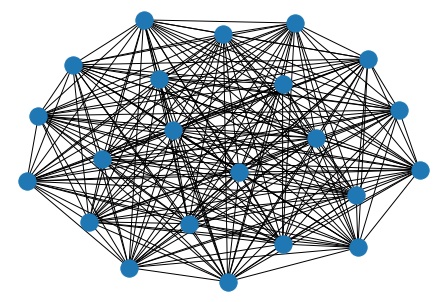

In [7]:
nx.draw(G)

In [8]:
#DENSITY: How many edges exist compared to max amount possible edges
density = nx.density(G)
print("Network density:", density)

Network density: 1.0


In [9]:
#CLUSTERING COEFFICIENT
nx.average_clustering(G)

1.0

Degree Centrality

In [10]:
# We use the in-built degree_centrality method
deg_cen = nx.degree_centrality(G)

In [11]:
print(deg_cen)

{'DerKeller15': 1.0, 'Broeki2': 1.0, 'BasoStream': 1.0, 'fayesxh': 1.0, 'chesscom_de': 1.0, 'Lara_Loft': 1.0, 'Silasueber': 1.0, 'Tayronlivereal': 1.0, 'DennisWerth_': 1.0, 'PainLivestream': 1.0, 'mortenroyale': 1.0, 'BigSpinCR': 1.0, 'KalleKoschinsky': 1.0, 'chess24de': 1.0, 'katooyoooo': 1.0, 'dannyreturns': 1.0, 'maxlivestream': 1.0, 'TrilluXe': 1.0, 'itsmahluna': 1.0, '99DAMAGEde': 1.0, 'WhiteCatOsu': 1.0, 'H0llyLP': 1.0}


In [12]:
# The following expression sorts the dictionary by
# degree centrality and returns the top 5 from a graph

sorted(deg_cen.items(),
       key=lambda x:x[1],
       reverse=True)[0:22]

[('DerKeller15', 1.0),
 ('Broeki2', 1.0),
 ('BasoStream', 1.0),
 ('fayesxh', 1.0),
 ('chesscom_de', 1.0),
 ('Lara_Loft', 1.0),
 ('Silasueber', 1.0),
 ('Tayronlivereal', 1.0),
 ('DennisWerth_', 1.0),
 ('PainLivestream', 1.0),
 ('mortenroyale', 1.0),
 ('BigSpinCR', 1.0),
 ('KalleKoschinsky', 1.0),
 ('chess24de', 1.0),
 ('katooyoooo', 1.0),
 ('dannyreturns', 1.0),
 ('maxlivestream', 1.0),
 ('TrilluXe', 1.0),
 ('itsmahluna', 1.0),
 ('99DAMAGEde', 1.0),
 ('WhiteCatOsu', 1.0),
 ('H0llyLP', 1.0)]

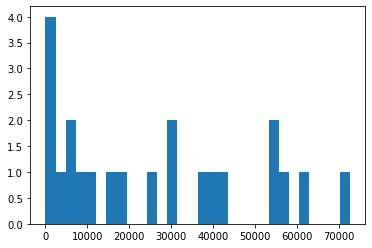

In [13]:
def weighted_degree(G, weight):
    w_deg = {}
    for n in G.nodes():#look at every node
        nbrs = list(G.neighbors(n)) #get nodes neighbors
        nbrs.append(n)
        S = G.subgraph(nbrs)#create a subgraph with the node and its neighbors
        w_deg[n]=sum([d["amount"] for n1,n2,d in S.edges(data=True) if n1==n or n2==n])
    #print(w_deg)
    return w_deg

plt.hist(list(weighted_degree(G, 'amount').values()), bins=30)
plt.show()

In [14]:
#top 5 streamer: Summe der Kantengewichte - wieviele Follower 
#teilt der Knoten mit allen seinen Nachbarn 
sorted(weighted_degree(G, 'amount').items(), key=lambda x:x[1], reverse=True)[0:5]

[('Lara_Loft', 72689),
 ('KalleKoschinsky', 62427),
 ('BasoStream', 56449),
 ('TrilluXe', 55197),
 ('itsmahluna', 53330)]

In [15]:
#EIGENVECTOR CENTRALITY: How many of my neighbors are also important Hubs
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
sorted(eigenvector_dict.items(),
       key=lambda x:x[1], reverse=True)[0:22]

[('DerKeller15', 0.2132007163556104),
 ('Broeki2', 0.2132007163556104),
 ('BasoStream', 0.2132007163556104),
 ('fayesxh', 0.2132007163556104),
 ('chesscom_de', 0.2132007163556104),
 ('Lara_Loft', 0.2132007163556104),
 ('Silasueber', 0.2132007163556104),
 ('Tayronlivereal', 0.2132007163556104),
 ('DennisWerth_', 0.2132007163556104),
 ('PainLivestream', 0.2132007163556104),
 ('mortenroyale', 0.2132007163556104),
 ('BigSpinCR', 0.2132007163556104),
 ('KalleKoschinsky', 0.2132007163556104),
 ('chess24de', 0.2132007163556104),
 ('katooyoooo', 0.2132007163556104),
 ('dannyreturns', 0.2132007163556104),
 ('maxlivestream', 0.2132007163556104),
 ('TrilluXe', 0.2132007163556104),
 ('itsmahluna', 0.2132007163556104),
 ('99DAMAGEde', 0.2132007163556104),
 ('WhiteCatOsu', 0.2132007163556104),
 ('H0llyLP', 0.2132007163556104)]

In [16]:
#BETWEENNESS CENTRALITY
# First check unweighted (just the structure)

sorted(nx.betweenness_centrality(G).items(),
       key=lambda x:x[1], reverse=True)[0:22]

[('DerKeller15', 0.0),
 ('Broeki2', 0.0),
 ('BasoStream', 0.0),
 ('fayesxh', 0.0),
 ('chesscom_de', 0.0),
 ('Lara_Loft', 0.0),
 ('Silasueber', 0.0),
 ('Tayronlivereal', 0.0),
 ('DennisWerth_', 0.0),
 ('PainLivestream', 0.0),
 ('mortenroyale', 0.0),
 ('BigSpinCR', 0.0),
 ('KalleKoschinsky', 0.0),
 ('chess24de', 0.0),
 ('katooyoooo', 0.0),
 ('dannyreturns', 0.0),
 ('maxlivestream', 0.0),
 ('TrilluXe', 0.0),
 ('itsmahluna', 0.0),
 ('99DAMAGEde', 0.0),
 ('WhiteCatOsu', 0.0),
 ('H0llyLP', 0.0)]

In [17]:
#PAGERANK
# by default weight attribute in PageRank is weight
# so we use weight=None to find the unweighted results
sorted_pr = sorted(nx.pagerank_numpy(G,
                weight=None).items(),
                key=lambda x:x[1], reverse=True)[0:10]

for node in sorted_pr:
    print(node)
#-> all have the same PR

('DerKeller15', 0.04545454545454546)
('Broeki2', 0.04545454545454546)
('BasoStream', 0.04545454545454546)
('fayesxh', 0.04545454545454546)
('chesscom_de', 0.04545454545454546)
('Lara_Loft', 0.04545454545454546)
('Silasueber', 0.04545454545454546)
('Tayronlivereal', 0.04545454545454546)
('DennisWerth_', 0.04545454545454546)
('PainLivestream', 0.04545454545454546)


In [18]:
#PageRank using the weights of the edges
#devalue some edges based on their weight.
sorted(nx.pagerank_numpy(
    G, weight='amount').items(),
    key=lambda x:x[1], reverse=True)[0:5]

[('Lara_Loft', 0.1102152449232191),
 ('KalleKoschinsky', 0.09352640089287997),
 ('TrilluXe', 0.08824823259940565),
 ('BasoStream', 0.08386342637739515),
 ('itsmahluna', 0.08000695492502721)]

Ein erster Unterschied im Top-5 Ranking ergibt sich beim gewichteten PageRank (betrachtet auch die Gewichte der Kanten): TrilluXe hat einen höheren PageRank, als BasoStream, obwohl letzerer mehr gemeinsame Follower mit anderen Streamern im Datensatz teilt (56449) als TrilluXe(55197). 

In [19]:
sorted(nx.pagerank_numpy(
    G, weight='amount_norm').items(),
    key=lambda x:x[1], reverse=True)[0:5]

[('Silasueber', 0.34987283699836963),
 ('chess24de', 0.06537863509590638),
 ('chesscom_de', 0.05110674787518541),
 ('katooyoooo', 0.04597145711778912),
 ('fayesxh', 0.04584077710956955)]

In [20]:
print(G.nodes["Lara_Loft"]["followerCount"])
print(G.nodes["KalleKoschinsky"]["followerCount"])
print(G.nodes["TrilluXe"]["followerCount"])
print(G.nodes["BasoStream"]["followerCount"])
print(G.nodes["itsmahluna"]["followerCount"])

86413
51580
103542
36775
27774


In [21]:
# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

NameError: name 'community_louvain' is not defined